In [16]:
import os       # using operating system dependent functionality (folders)
import pandas as pd # data analysis and manipulation
import numpy as np    # numerical computing (manipulating and performing operations on arrays of data)
import seaborn
import glob
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../') # path to functions
import cvasl.seperated as sep
from cvasl.file_handler import Config

## Read datasets into pandas dataframes

We have these in our open_work

In [2]:
# Identify files
datasets_folder = '../open_work/internal_results'
dataset_files = glob.glob(os.path.join(datasets_folder, '*.csv'))
print(dataset_files)

['../open_work/internal_results\\Insight46_stitched.csv', '../open_work/internal_results\\StrokeMRI_stitched.csv', '../open_work/internal_results\\top_stitched.csv']


In [ ]:
!pwd

In [3]:
# Read files into dataframes
TOP = pd.read_csv('../open_work/internal_results\\top_stitched.csv')
StrokeMRI = pd.read_csv('../open_work/internal_results\\StrokeMRI_stitched.csv')
Insight46 = pd.read_csv('../open_work/internal_results\\Insight46_stitched.csv')
df_list = [TOP, StrokeMRI, Insight46]


In [4]:
TOP = TOP.drop(0, axis=0)
StrokeMRI = StrokeMRI.drop(0, axis=0)
Insight46 = Insight46.drop(0, axis=0)


In [5]:
Insight46_described = Insight46.describe()
Insight46_described

,Unnamed: 0,SubjectNList,Site,GM_vol,WM_vol,CSF_vol,GM_ICVRatio,GMWM_ICVRatio,WMH_vol,WMH_count,...,PCA_intermediate_L,PCA_intermediate_R,PCA_distal_B,PCA_distal_L,PCA_distal_R,TotalGM_B,TotalGM_L,TotalGM_R,Sex,Age
count,400.000000,400.00000,400.0,203.000000,203.000000,203.000000,203.000000,203.000000,196.000000,196.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,400.00000,400.000000
mean,200.500000,158.38250,1.0,0.590779,0.487410,0.385138,0.404790,0.737683,5.725281,23.295918,...,4.338897,5.244480,3.736958,5.631347,5.717561,3.634675,3.857666,23.809182,0.49250,70.653937
std,115.614301,91.07914,0.0,0.049407,0.059297,0.070550,0.021693,0.034861,7.221506,10.268407,...,5.088095,5.348063,24.637233,4.151837,3.518939,6.090412,4.014463,235.151457,0.50057,0.663201
min,1.000000,2.00000,1.0,0.450950,0.363210,0.233400,0.356390,0.654770,0.256000,6.000000,...,-42.215900,0.000000,-285.910500,-27.604500,0.000000,-61.431600,-27.687700,0.000000,0.00000,69.263889
25%,100.750000,79.75000,1.0,0.556000,0.446225,0.331020,0.388595,0.709050,1.461000,16.000000,...,3.347700,3.572050,3.922825,3.924000,3.768125,3.084175,3.021250,3.049025,0.00000,70.093750
50%,200.500000,157.50000,1.0,0.591890,0.489020,0.378120,0.405770,0.741200,3.182500,22.000000,...,4.106000,4.174800,5.300200,5.147600,4.988000,3.617700,3.598900,3.584300,0.00000,70.666667
75%,300.250000,237.25000,1.0,0.629085,0.528325,0.435635,0.422815,0.768810,7.017750,28.000000,...,4.897725,5.377075,6.765575,6.873300,6.447250,4.593850,4.560625,4.406875,1.00000,71.208333
max,400.000000,317.00000,1.0,0.711210,0.619440,0.551160,0.462930,0.797130,48.633000,74.000000,...,36.312400,54.626700,19.578200,21.603400,32.232600,30.906500,36.465100,2806.075900,1.00000,71.863889


In [6]:
StrokeMRI_described = StrokeMRI.describe()
StrokeMRI_described

,Unnamed: 0,LongitudinalTimePoint,SubjectNList,Site,GM_vol,WM_vol,CSF_vol,GM_ICVRatio,GMWM_ICVRatio,WMH_vol,...,TotalGM_R,DeepWM_B.1,DeepWM_L.1,DeepWM_R.1,TotalGM_B.1,TotalGM_L.1,TotalGM_R.1,T,Sex,Age
count,588.000000,588.0,588.000000,588.0,587.000000,587.000000,587.000000,587.000000,587.000000,533.000000,...,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,588.000000,588.000000,588.000000
mean,294.500000,1.0,295.500000,1.0,0.624442,0.501613,0.387366,0.413719,0.745137,10.101743,...,1.871637,25.415981,25.610654,25.237573,62.698115,63.251458,62.177805,1.421769,0.622449,60.846161
std,169.885255,0.0,169.885255,0.0,0.063345,0.058896,0.090290,0.033982,0.048164,12.583794,...,0.276281,3.920791,4.161020,3.913199,11.606074,11.906722,11.473404,0.494262,0.485187,14.163636
min,1.000000,1.0,2.000000,1.0,0.469790,0.324170,0.197210,0.321180,0.608750,0.617000,...,1.358400,17.913100,17.027500,17.967700,30.302200,30.073000,30.561500,1.000000,0.000000,20.505464
25%,147.750000,1.0,148.750000,1.0,0.579055,0.460070,0.320140,0.391670,0.710695,3.046000,...,1.708150,22.738725,22.745625,22.565875,55.699900,55.959925,55.465150,1.000000,0.000000,51.242466
50%,294.500000,1.0,295.500000,1.0,0.622270,0.498320,0.374870,0.412980,0.746530,5.256000,...,1.820000,24.759550,24.936350,24.670150,61.883350,62.552600,61.391600,1.000000,1.000000,65.360274
75%,441.250000,1.0,442.250000,1.0,0.660965,0.539675,0.442655,0.436210,0.779650,11.557000,...,1.962025,27.415875,27.629000,27.119900,69.943800,71.003750,69.525000,2.000000,1.000000,71.641096
max,588.000000,1.0,589.000000,1.0,0.893730,0.700880,0.673380,0.515040,0.857940,80.019000,...,4.365100,49.893000,50.248800,49.561100,98.751100,102.547200,95.351500,2.000000,1.000000,94.668493


TOP was produced in a way that made more data non-numeric do extra step:

In [7]:
TOP =  TOP.apply (pd.to_numeric, errors='coerce')
TOP_described =TOP.describe()
TOP_described

,participant_id,session,LongitudinalTimePoint,SubjectNList,Site,GM_vol,WM_vol,CSF_vol,GM_ICVRatio,GMWM_ICVRatio,...,PCA_intermediate_R.1,PCA_distal_B.1,PCA_distal_L.1,PCA_distal_R.1,TotalGM_B.1,TotalGM_L.1,TotalGM_R.1,TP,Sex,Age
count,0.0,0.0,895.0,895.000000,895.0,894.000000,894.000000,894.000000,894.000000,894.000000,...,892.000000,892.000000,892.000000,892.000000,893.000000,893.000000,893.000000,531.0,531.000000,531.000000
mean,NaN,NaN,1.0,448.000000,1.0,0.695626,0.523190,0.303312,0.458038,0.801505,...,67.875904,82.173214,84.191690,80.107499,71.285952,71.944403,70.620393,1.0,0.536723,37.548889
std,NaN,NaN,0.0,258.508543,0.0,0.065406,0.061380,0.063176,0.028039,0.032086,...,24.706634,21.721512,22.878270,21.353878,28.233116,27.675492,28.877910,0.0,0.499120,9.581361
min,NaN,NaN,1.0,1.000000,1.0,0.462590,0.355810,0.165810,0.376790,0.704690,...,28.110900,29.021200,27.897000,30.604000,31.974600,31.920800,32.021400,1.0,0.000000,17.720000
25%,NaN,NaN,1.0,224.500000,1.0,0.650382,0.480112,0.255890,0.438435,0.781495,...,58.522875,70.432950,71.759150,68.155500,62.106000,62.906600,61.396200,1.0,0.000000,30.260000
50%,NaN,NaN,1.0,448.000000,1.0,0.693810,0.518600,0.302690,0.459140,0.802510,...,66.254600,81.727500,83.917400,79.472350,69.353300,70.075200,68.701600,1.0,1.000000,37.730000
75%,NaN,NaN,1.0,671.500000,1.0,0.739258,0.563233,0.342893,0.477023,0.823808,...,74.079700,91.675725,93.654875,89.939725,76.976500,78.046500,76.254600,1.0,1.000000,44.950000
max,NaN,NaN,1.0,895.000000,1.0,0.940450,0.732160,0.548010,0.542910,0.883590,...,575.367100,429.595100,474.206100,394.829700,710.292300,684.509900,736.989500,1.0,1.000000,59.780000


In [8]:
TOP

,participant_id,session,LongitudinalTimePoint,SubjectNList,Site,GM_vol,WM_vol,CSF_vol,GM_ICVRatio,GMWM_ICVRatio,...,PCA_intermediate_R.1,PCA_distal_B.1,PCA_distal_L.1,PCA_distal_R.1,TotalGM_B.1,TotalGM_L.1,TotalGM_R.1,TP,Sex,Age
1,NaN,NaN,1,1,1,0.71736,0.52803,0.31812,0.45881,0.79653,...,76.2191,83.6050,71.4460,96.2028,60.6981,57.9220,63.8339,1.0,1.0,43.49
2,NaN,NaN,1,2,1,0.72383,0.62394,0.25673,0.45112,0.83999,...,69.7295,90.1896,93.3760,85.1374,71.6047,74.1927,68.7649,1.0,0.0,38.30
3,NaN,NaN,1,3,1,0.71919,0.44499,0.39444,0.46143,0.74693,...,82.4922,100.5462,105.0117,94.6801,82.4797,82.9234,81.9457,NaN,NaN,NaN
4,NaN,NaN,1,4,1,0.64079,0.52942,0.27159,0.44444,0.81163,...,59.1239,66.4437,68.8396,64.2212,63.7201,65.3173,62.0529,NaN,NaN,NaN
5,NaN,NaN,1,5,1,0.70341,0.52337,0.31289,0.45686,0.79678,...,93.0762,113.2723,114.2614,112.1711,93.0743,94.7247,91.2521,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,NaN,NaN,1,891,1,0.71537,0.48601,0.27123,0.48578,0.81582,...,72.8863,85.6300,92.9272,79.7285,77.1030,76.9157,77.3044,1.0,0.0,33.86
892,NaN,NaN,1,892,1,0.68938,0.52763,0.26509,0.46514,0.82114,...,49.2011,58.2895,59.8466,56.0928,54.5250,55.3724,53.5625,NaN,NaN,NaN
893,NaN,NaN,1,893,1,0.73473,0.53549,0.35985,0.45074,0.77924,...,48.8532,67.8209,68.9911,65.9914,54.4204,54.3193,54.5318,1.0,1.0,33.92
894,NaN,NaN,1,894,1,0.71094,0.60974,0.37480,0.41931,0.77894,...,41.1785,49.5986,51.9290,47.0285,51.4417,52.1897,50.5664,1.0,1.0,45.31


So datasets are very incomparable by age. We must compare similar age groups. Let's see if we can break the datasets down by age group?

In [9]:
top_grouped_sex_count = TOP.groupby(['Sex'])['GM_vol'].count()
top_grouped_sex_mean = TOP.groupby(['Sex'])['GM_vol'].mean()
#df.groupby(["state", "gender"])["last_name"].count()
top_grouped_sex_mean

Sex
0.0    0.660387
1.0    0.728508
Name: GM_vol, dtype: float64

That's odd, I though men had bigger brains by volume. Let's see if an age split explains this

In [10]:
top_grouped_sex_mean_age = TOP.groupby(['Sex'])['Age'].mean()
#df.groupby(["state", "gender"])["last_name"].count()
top_grouped_sex_mean_age

Sex
0.0    37.630854
1.0    37.478140
Name: Age, dtype: float64

So if women are 1s then they have bigger brains...given that the ages are close. 

1. split out the age groups and compare averages, std, distribution etc. on all parameters
-----------------------------------------------------------------------------
0. meet to make sure dataframes are in fact correct
1a. compare TOP and StrokeMRI only? -> gives us a difference as allowable? gives us baseline on same measurements
1b. do a polynomial fits on the error with age (per variability)
1c. investigate brain age gap on this (it should be zero)



1z. compare Insight46-> every other group's 70+/1 year
question of whether Inisght46 people are not truly all healthy



by the way, let's look a little deeper on our data

In [18]:
from sklearn.decomposition import PCA



In [53]:
top_skinny = TOP.iloc[:, 5:]
df_to_check = top_skinny.dropna()
df_to_check

,GM_vol,WM_vol,CSF_vol,GM_ICVRatio,GMWM_ICVRatio,WMH_vol,WMH_count,DeepWM_B,DeepWM_L,DeepWM_R,...,PCA_intermediate_R.1,PCA_distal_B.1,PCA_distal_L.1,PCA_distal_R.1,TotalGM_B.1,TotalGM_L.1,TotalGM_R.1,TP,Sex,Age
1,0.71736,0.52803,0.31812,0.45881,0.79653,1.743,24.0,8.7620,8.5880,8.9388,...,76.2191,83.6050,71.4460,96.2028,60.6981,57.9220,63.8339,1.0,1.0,43.49
2,0.72383,0.62394,0.25673,0.45112,0.83999,1.629,23.0,9.0749,7.6862,10.2840,...,69.7295,90.1896,93.3760,85.1374,71.6047,74.1927,68.7649,1.0,0.0,38.30
15,0.71224,0.53295,0.33594,0.45046,0.78753,0.621,13.0,8.8791,8.9325,8.8246,...,71.3670,93.0546,87.1016,101.5950,74.0588,73.2642,74.9254,1.0,1.0,32.30
16,0.67042,0.43458,0.25974,0.49124,0.80968,0.736,23.0,6.2080,6.2908,6.1139,...,69.8818,96.3119,94.6079,98.0099,79.1128,79.1545,79.0710,1.0,0.0,21.97
18,0.63666,0.46938,0.22144,0.47960,0.83319,2.009,22.0,7.4561,7.5164,7.3614,...,73.4210,88.7337,91.4656,86.0431,73.3492,73.4193,73.2958,1.0,0.0,37.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,0.78201,0.49489,0.24608,0.51347,0.83842,1.431,18.0,8.2103,7.5421,8.7134,...,85.9119,115.6876,128.9588,102.7405,96.4466,99.4881,93.2525,1.0,0.0,19.06
891,0.71537,0.48601,0.27123,0.48578,0.81582,1.425,18.0,6.6858,6.3732,7.0912,...,72.8863,85.6300,92.9272,79.7285,77.1030,76.9157,77.3044,1.0,0.0,33.86
893,0.73473,0.53549,0.35985,0.45074,0.77924,3.935,20.0,4.5665,4.8245,4.3038,...,48.8532,67.8209,68.9911,65.9914,54.4204,54.3193,54.5318,1.0,1.0,33.92
894,0.71094,0.60974,0.37480,0.41931,0.77894,4.170,26.0,9.5267,9.9459,9.0904,...,41.1785,49.5986,51.9290,47.0285,51.4417,52.1897,50.5664,1.0,1.0,45.31


In [ ]:
precent_of_variance_explained = .95

pca = PCA(n_components=precent_of_variance_explained)

pca_data = pca.fit_transform(X)

                    PC0       PC1       PC2       PC3       PC4       PC5  \
GM_vol         0.000005 -0.000186  0.000330  0.001967 -0.000859 -0.002009   
WM_vol        -0.000011  0.000046  0.000166  0.001110  0.001206 -0.000147   
CSF_vol       -0.000018  0.000071  0.000140 -0.000159  0.002163  0.002002   
GM_ICVRatio    0.000010 -0.000101  0.000027  0.000419 -0.001297 -0.001264   
GMWM_ICVRatio  0.000008 -0.000055 -0.000006  0.000490 -0.001079 -0.001329   
...                 ...       ...       ...       ...       ...       ...   
TotalGM_L.1    0.180789  0.067342 -0.003130  0.045484 -0.106630  0.002451   
TotalGM_R.1    0.191660  0.102602  0.000611  0.075779 -0.046258 -0.084429   
TP            -0.000000 -0.000000  0.000000 -0.000000 -0.000000  0.000000   
Sex           -0.000087  0.001425  0.004767  0.010120  0.006514 -0.001270   
Age           -0.007100  0.060796  0.014061 -0.286960  0.544391  0.598118   

                        PC6       PC7       PC8       PC9  ...      PC84  \

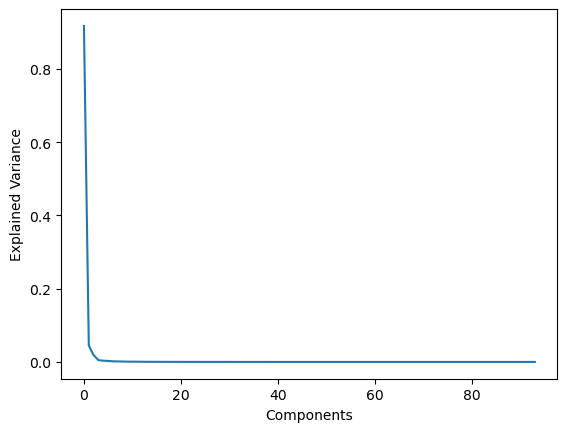

In [65]:


# You must normalize the data before applying the fit method

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_to_check)
pca = PCA(n_components= df_to_check.shape[1])
pca.fit(df_to_check)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_to_check.columns))],
index=df_to_check.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

## OK, so let's note we have a 94 column dataset , but only about 5 columns are really independant variables by this analysis. 
let's take a closer look at the first 10

In [67]:
df_to_check.columns[:10]

Index(['GM_vol', 'WM_vol', 'CSF_vol', 'GM_ICVRatio', 'GMWM_ICVRatio',
       'WMH_vol', 'WMH_count', 'DeepWM_B', 'DeepWM_L', 'DeepWM_R'],
      dtype='object')

In [107]:
first_akk = df_to_check[df_to_check.columns[:-2]]
X = first_akk
X.columns

Index(['GM_vol', 'WM_vol', 'CSF_vol', 'GM_ICVRatio', 'GMWM_ICVRatio',
       'WMH_vol', 'WMH_count', 'DeepWM_B', 'DeepWM_L', 'DeepWM_R', 'ACA_B',
       'ACA_L', 'ACA_R', 'MCA_B', 'MCA_L', 'MCA_R', 'PCA_B', 'PCA_L', 'PCA_R',
       'ACA_proximal_B', 'ACA_proximal_L', 'ACA_proximal_R',
       'ACA_intermediate_B', 'ACA_intermediate_L', 'ACA_intermediate_R',
       'ACA_distal_B', 'ACA_distal_L', 'ACA_distal_R', 'MCA_proximal_B',
       'MCA_proximal_L', 'MCA_proximal_R', 'MCA_intermediate_B',
       'MCA_intermediate_L', 'MCA_intermediate_R', 'MCA_distal_B',
       'MCA_distal_L', 'MCA_distal_R', 'PCA_proximal_B', 'PCA_proximal_L',
       'PCA_proximal_R', 'PCA_intermediate_B', 'PCA_intermediate_L',
       'PCA_intermediate_R', 'PCA_distal_B', 'PCA_distal_L', 'PCA_distal_R',
       'TotalGM_B', 'TotalGM_L', 'TotalGM_R', 'DeepWM_B.1', 'DeepWM_L.1',
       'DeepWM_R.1', 'ACA_B.1', 'ACA_L.1', 'ACA_R.1', 'MCA_B.1', 'MCA_L.1',
       'MCA_R.1', 'PCA_B.1', 'PCA_L.1', 'PCA_R.1', 'ACA_proximal_

In [108]:
sex = df_to_check[['Sex']]
y = sex

In [109]:
df = pd.DataFrame(X)
df['Label']=y
##df['Species']=df['Label'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df.head()

,GM_vol,WM_vol,CSF_vol,GM_ICVRatio,GMWM_ICVRatio,WMH_vol,WMH_count,DeepWM_B,DeepWM_L,DeepWM_R,...,PCA_intermediate_L.1,PCA_intermediate_R.1,PCA_distal_B.1,PCA_distal_L.1,PCA_distal_R.1,TotalGM_B.1,TotalGM_L.1,TotalGM_R.1,TP,Label
1,0.71736,0.52803,0.31812,0.45881,0.79653,1.743,24.0,8.7620,8.5880,8.9388,...,56.1429,76.2191,83.6050,71.4460,96.2028,60.6981,57.9220,63.8339,1.0,1.0
2,0.72383,0.62394,0.25673,0.45112,0.83999,1.629,23.0,9.0749,7.6862,10.2840,...,73.7114,69.7295,90.1896,93.3760,85.1374,71.6047,74.1927,68.7649,1.0,0.0
15,0.71224,0.53295,0.33594,0.45046,0.78753,0.621,13.0,8.8791,8.9325,8.8246,...,68.8747,71.3670,93.0546,87.1016,101.5950,74.0588,73.2642,74.9254,1.0,1.0
16,0.67042,0.43458,0.25974,0.49124,0.80968,0.736,23.0,6.2080,6.2908,6.1139,...,78.5296,69.8818,96.3119,94.6079,98.0099,79.1128,79.1545,79.0710,1.0,0.0
18,0.63666,0.46938,0.22144,0.47960,0.83319,2.009,22.0,7.4561,7.5164,7.3614,...,74.3816,73.4210,88.7337,91.4656,86.0431,73.3492,73.4193,73.2958,1.0,0.0


In [117]:
X.shape

(529, 92)

In [116]:
#Transform features
pca = PCA()
X_pca = pca.fit_transform(X)
X_pca.shape

(529, 92)

In [118]:
#Merge with df
pca_df = pd.DataFrame(X_pca,columns=['PC%s' % _ for _ in range(X.shape[1])])
df = pd.merge(df, pca_df, right_index=True, left_index=True)

In [119]:
print('Explained Variance Ratio')
for i in range(10):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))

Explained Variance Ratio
PC1: 0.9201483039601956
PC2: 0.04457675340208729
PC3: 0.018426209505120916
PC4: 0.004676829594154406
PC5: 0.003031413779895384
PC6: 0.0017675452756850984
PC7: 0.0016273210177740996
PC8: 0.001087289225652292
PC9: 0.0007502758003022057
PC10: 0.0007183065369692148


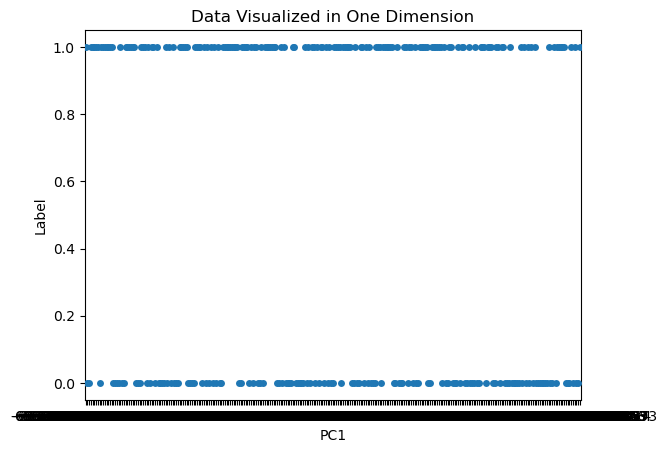

In [120]:
seaborn.stripplot(x="PC1", y="Label", data=df,jitter=True)
plt.title( 'Data Visualized in One Dimension');

In [127]:
df

,GM_vol,WM_vol,CSF_vol,GM_ICVRatio,GMWM_ICVRatio,WMH_vol,WMH_count,DeepWM_B,DeepWM_L,DeepWM_R,...,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91
1,0.71736,0.52803,0.31812,0.45881,0.79653,1.743,24.0,8.7620,8.5880,8.9388,...,0.020872,0.012829,-0.012856,-0.005233,-0.006800,0.003082,-0.004703,-0.002891,0.000086,1.738446e-14
2,0.72383,0.62394,0.25673,0.45112,0.83999,1.629,23.0,9.0749,7.6862,10.2840,...,0.038806,-0.008215,-0.007023,-0.010366,0.000883,0.001793,-0.002809,-0.001310,-0.000315,-2.459171e-14
15,0.71224,0.53295,0.33594,0.45046,0.78753,0.621,13.0,8.8791,8.9325,8.8246,...,0.002085,0.002861,0.003682,0.007201,0.001152,-0.001519,0.000494,0.002164,0.001933,-8.883341e-15
16,0.67042,0.43458,0.25974,0.49124,0.80968,0.736,23.0,6.2080,6.2908,6.1139,...,-0.029999,0.044723,0.011969,-0.004689,-0.001020,-0.006880,0.006765,0.005060,-0.001596,1.368833e-14
18,0.63666,0.46938,0.22144,0.47960,0.83319,2.009,22.0,7.4561,7.5164,7.3614,...,0.001316,-0.013272,-0.011120,0.002612,-0.002448,0.006893,0.002704,-0.000698,0.001095,-3.942849e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,0.54543,0.48861,0.33071,0.39966,0.75768,3.659,29.0,6.2833,5.7853,6.9931,...,0.014663,0.006446,0.014976,0.002674,-0.006353,-0.003488,0.004211,-0.000035,-0.000847,-1.491386e-15
522,0.69899,0.56734,0.46120,0.40462,0.73303,4.763,25.0,6.0357,5.8881,6.2006,...,-0.008628,0.009810,0.001193,0.005306,0.001302,0.000117,0.001881,-0.001174,-0.000086,-4.873288e-15
524,0.60334,0.49073,0.33043,0.42355,0.76804,0.938,18.0,7.6650,6.7552,8.0007,...,-0.009703,-0.003898,0.022116,-0.007801,-0.004178,0.004627,0.002359,0.000874,-0.000290,1.429612e-15
525,0.73251,0.51495,0.18562,0.51114,0.87047,1.287,18.0,7.6868,7.3265,7.7588,...,-0.007631,0.009579,0.004295,-0.012909,-0.000581,0.001196,0.000888,-0.001588,-0.000014,-2.788970e-15


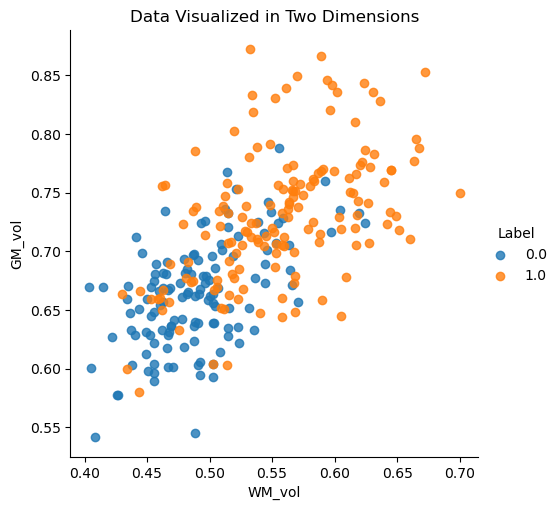

In [133]:
seaborn.lmplot(data=df,x= 'WM_vol', y='GM_vol', hue='Label',fit_reg=False)
plt.title('Data Visualized in Two Dimensions');

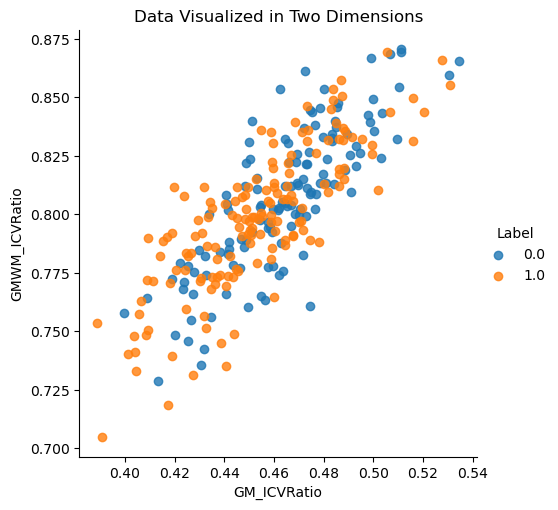

In [134]:
seaborn.lmplot(data=df,x= 'GM_ICVRatio', y='GMWM_ICVRatio', hue='Label',fit_reg=False)
plt.title('Data Visualized in Two Dimensions');

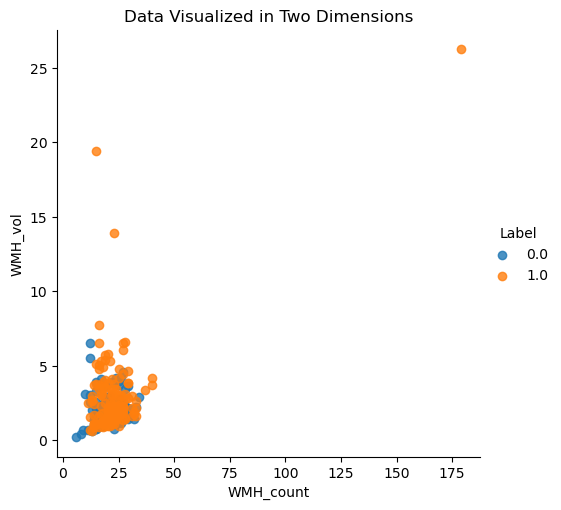

In [135]:
seaborn.lmplot(data=df,x= 'WMH_count', y='WMH_vol', hue='Label',fit_reg=False)
plt.title('Data Visualized in Two Dimensions');

In [123]:
percent_of_variance_explained = .99

pca = PCA(n_components=percent_of_variance_explained)

pca_data = pca.fit_transform(X)

print("{} Principal Components are required to explain {} of the variation in this data.".format(pca.n_components_,percent_of_variance_explained))



5 Principal Components are required to explain 0.99 of the variation in this data.


                    PC0       PC1       PC2       PC3
GM_vol        -0.000026  0.008180  0.009177  0.002411
WM_vol         0.000123  0.008599  0.016576 -0.001445
CSF_vol        0.000069 -0.005719  0.003886 -0.001516
GM_ICVRatio   -0.000066  0.001966 -0.002771  0.001681
GMWM_ICVRatio -0.000024  0.005073  0.001257  0.000792
WMH_vol        0.078571 -0.253119  0.962194 -0.059757
WMH_count      0.996759  0.036708 -0.071468  0.003990
DeepWM_B      -0.010213  0.562296  0.140396 -0.000127
DeepWM_L      -0.009523  0.555134  0.193932  0.693087
DeepWM_R      -0.010187  0.556803  0.106633 -0.718352


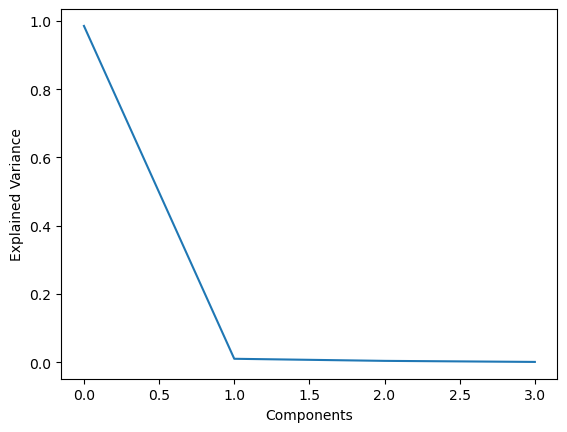

In [77]:

scaler.fit(first_10)
pca = PCA(n_components= 4)
pca.fit(first_10)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(4)],
index=first_10.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

<AxesSubplot:>

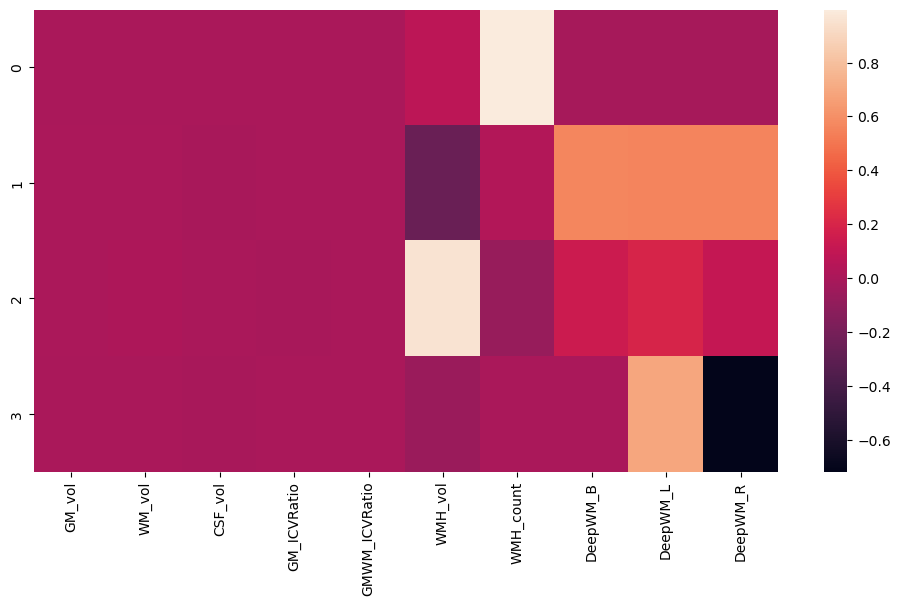

In [78]:
map= pd.DataFrame(pca.components_,columns=first_10.columns)
plt.figure(figsize=(12,6))
seaborn.heatmap(map,cmap='rocket')

# Anyways

In [206]:
# TOP_tiny = TOP[['GM_vol', 'WM_vol','Age']]
# TOP_tiny

In [207]:
# Stroke_tiny = StrokeMRI[['GM_vol', 'WM_vol','Age']]
# Stroke_tiny

In [208]:
# plt.scatter(Stroke_tiny['Age'],Stroke_tiny['GM_vol'], color='purple')
# plt.scatter(TOP['Age'],TOP['GM_vol'])

In [220]:

def relate_columns_graphs_two_dfs(dataframe1, dataframe2, special_column_name, other_column_name):
    """ This function makes a scatter plot of all columns

    :param dataframe1: dataframe variable
    :type dataframe1: pandas.dataFrame
    :param dataframe2: dataframe variable
    :type dataframe2: pandas.dataFrame
    :param special_column_name: string of column you want to graph against
    :type  special_column_name: str

    :returns: no return, makes artifact
    :rtype: None.
    """
    shared_columns = (dataframe1.columns.intersection(dataframe2.columns)).to_list()
    
    dataframe1 = dataframe1[shared_columns]
    dataframe2 = dataframe2[shared_columns]
#     print(dataframe1)
    plt.scatter(dataframe1[special_column_name],dataframe1[other_column_name], color='purple', alpha=0.5)
    plt.scatter(dataframe2[special_column_name],dataframe2[other_column_name], color = 'orange',alpha=0.5)
    plt.xlabel(special_column_name)
    plt.ylabel(other_column_name)
    #plt.show( block=False )
    plt.savefig((other_column_name +"versus" + special_column_name + ".png"))
    plt.show( block=False )

In [221]:
def plot_2on2_df(dataframe1, dataframe2, special_column):
    shared_columns = (dataframe1.columns.intersection(dataframe2.columns)).to_list()
    for rotator_column in dataframe1[shared_columns]:
        relate_columns_graphs_two_dfs(dataframe1, dataframe2,special_column, rotator_column)

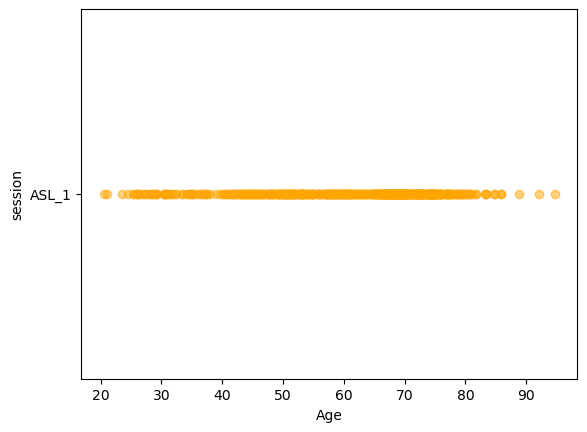

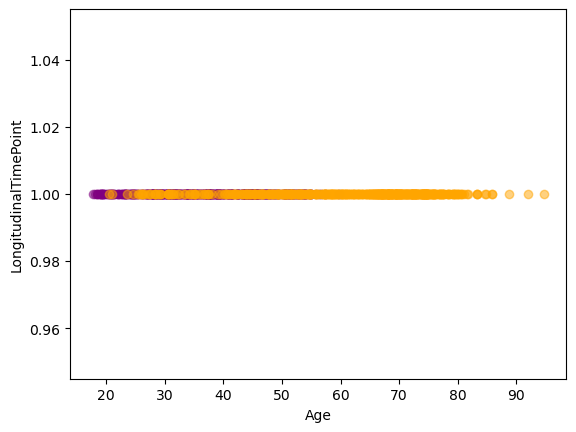

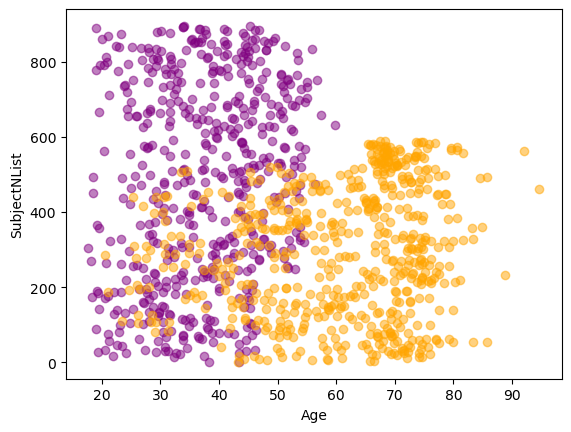

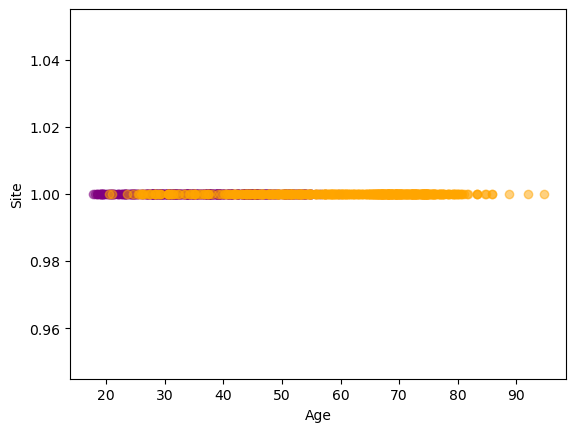

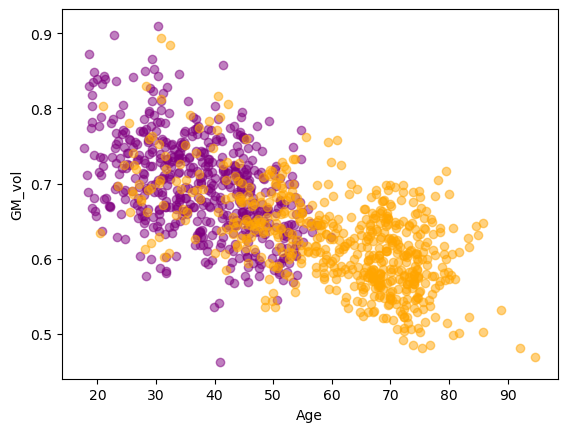

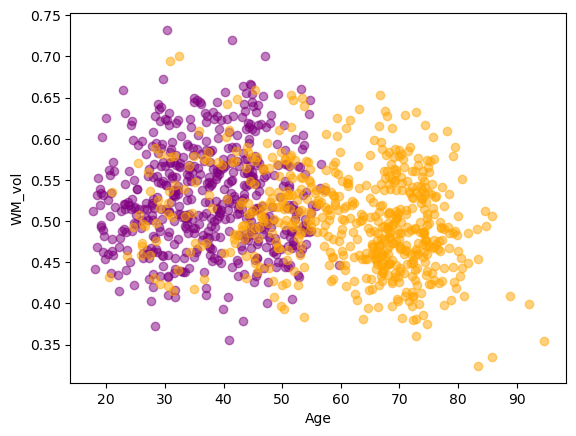

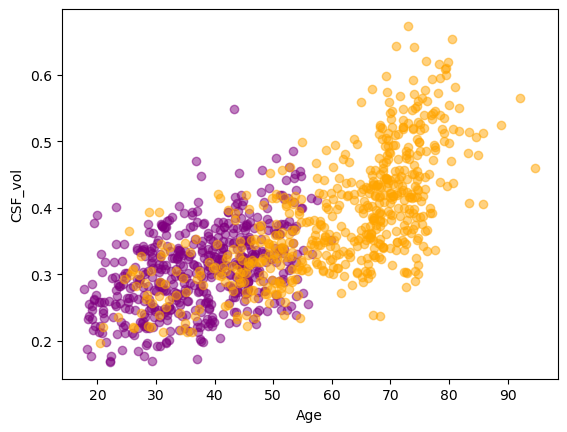

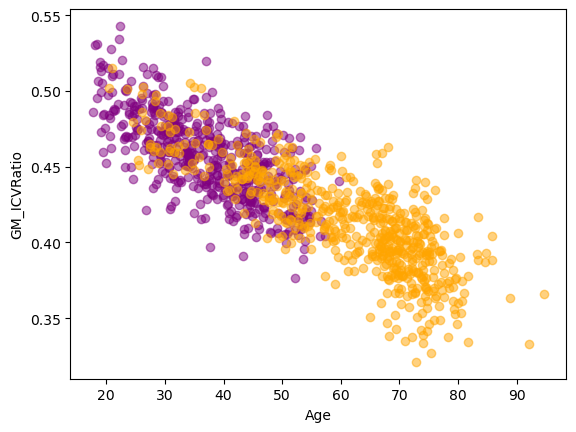

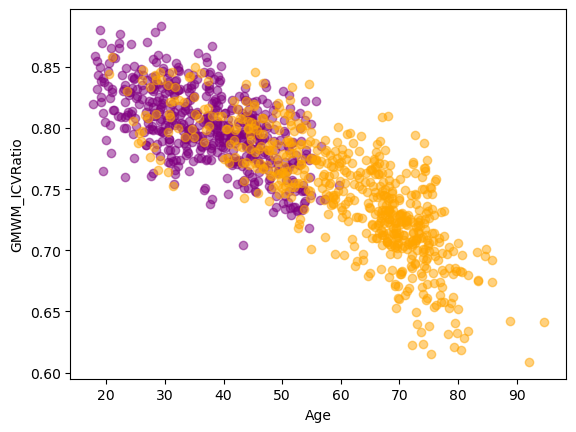

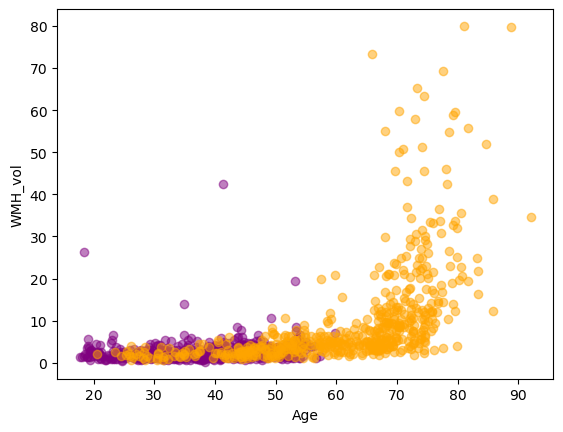

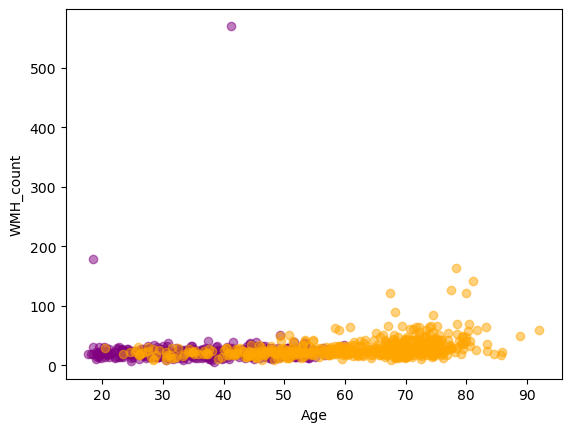

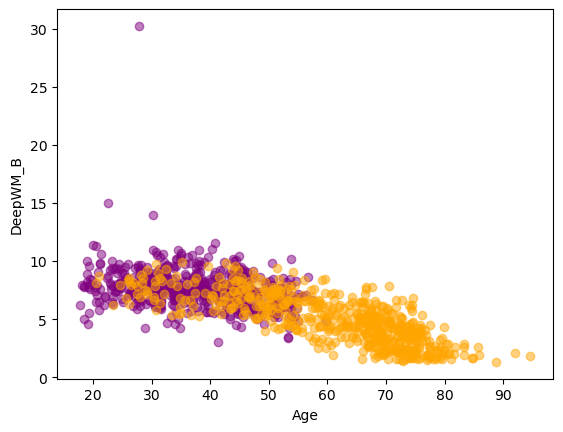

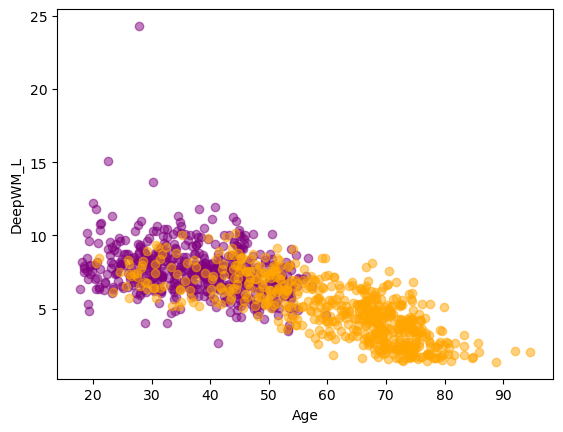

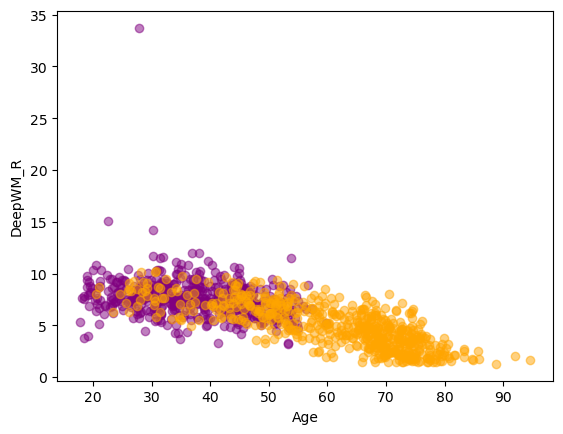

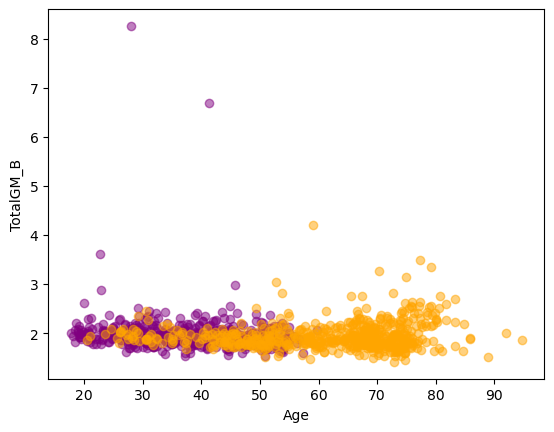

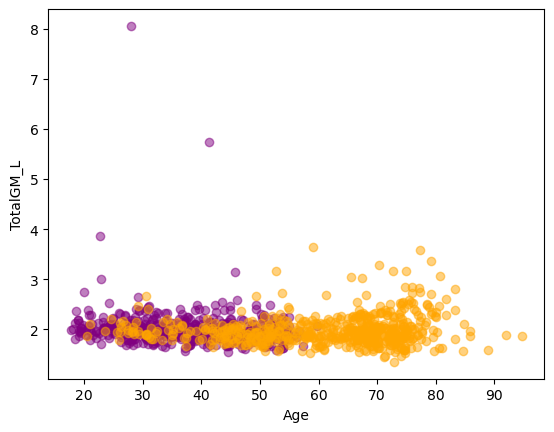

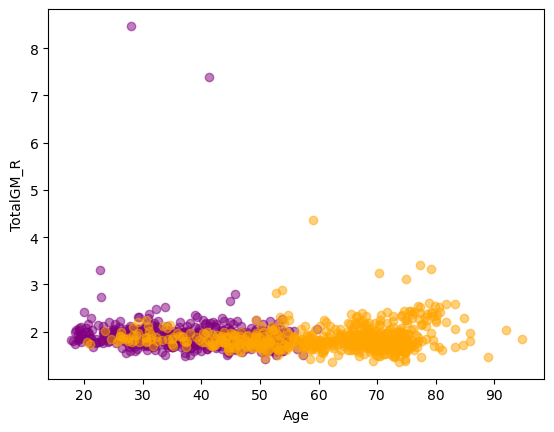

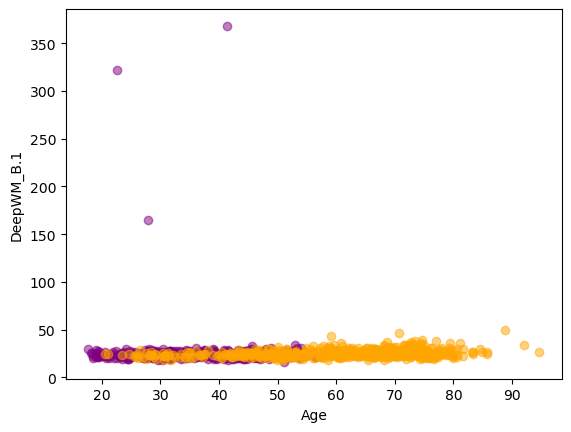

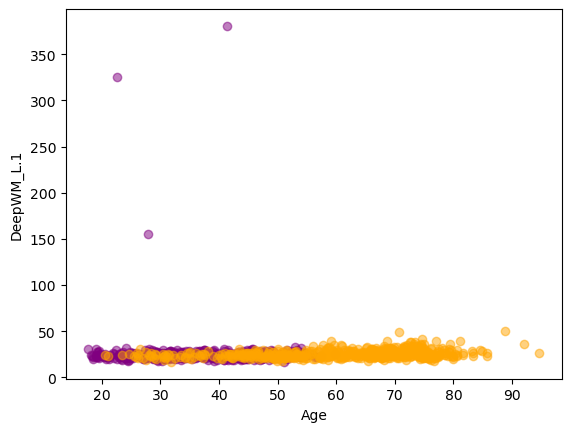

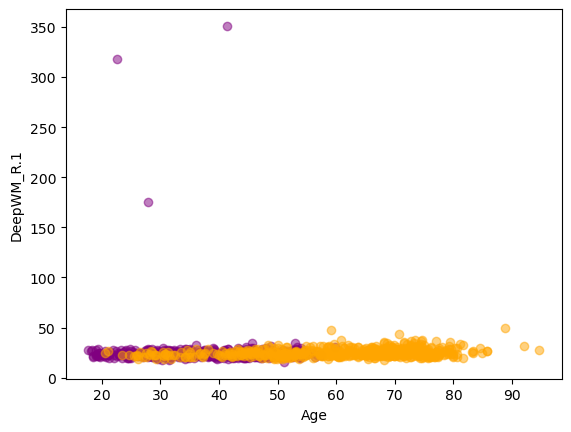

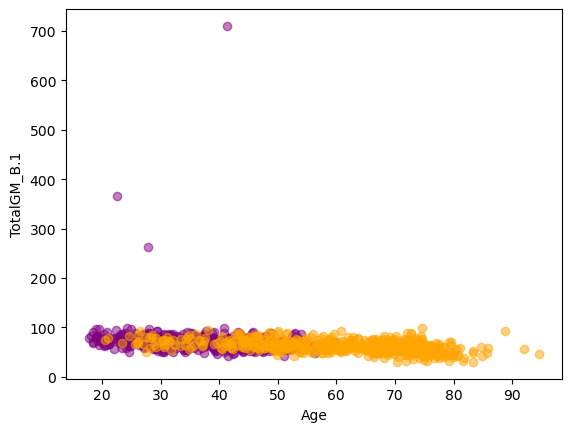

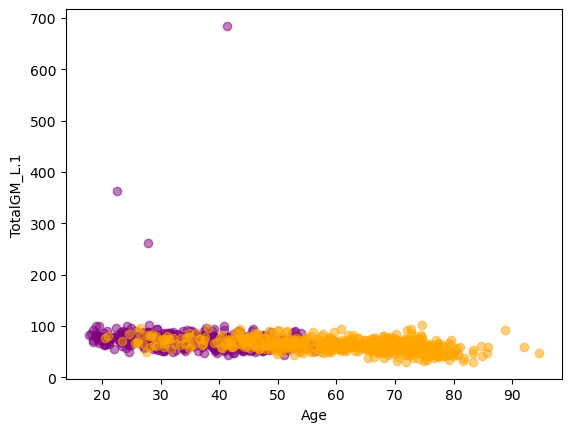

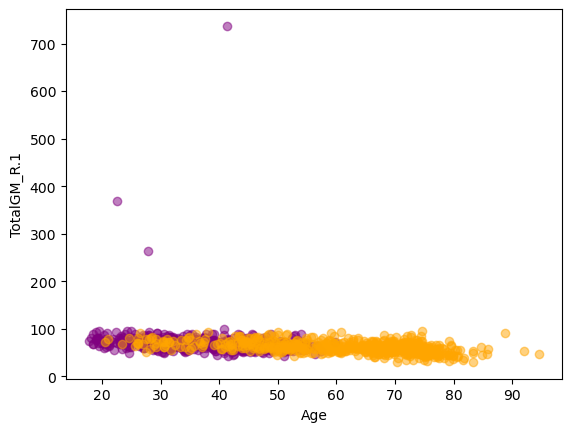

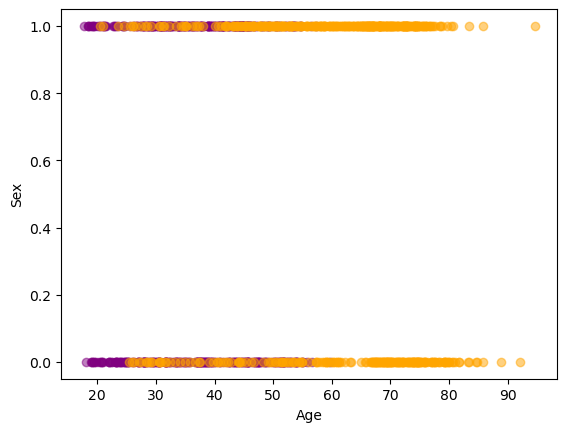

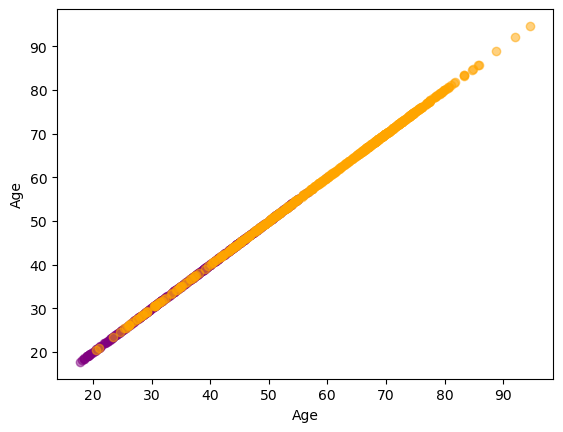

In [222]:
plot_2on2_df(TOP,StrokeMRI, 'Age')

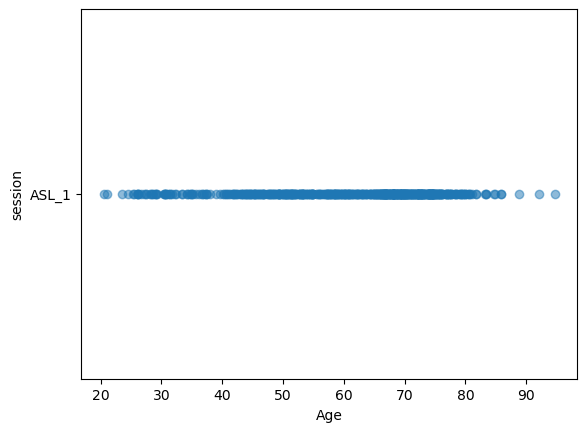

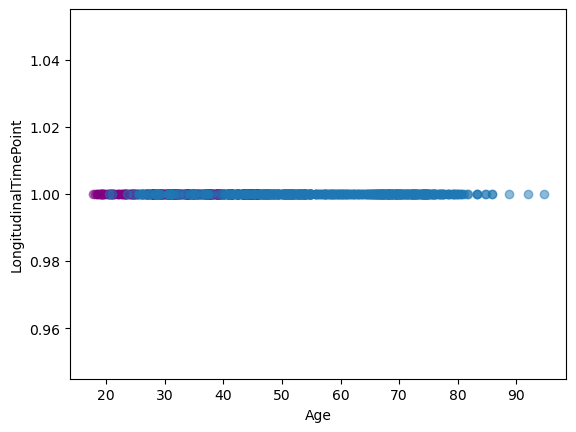

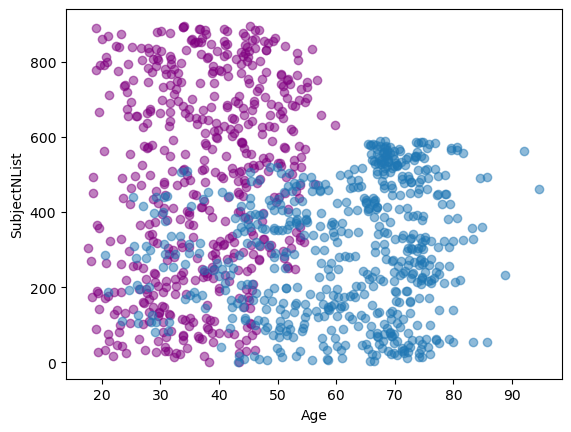

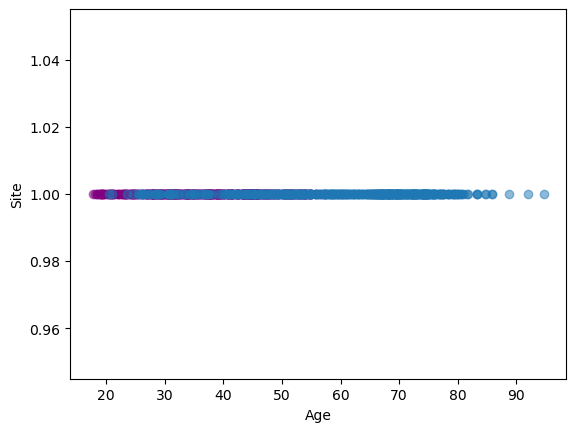

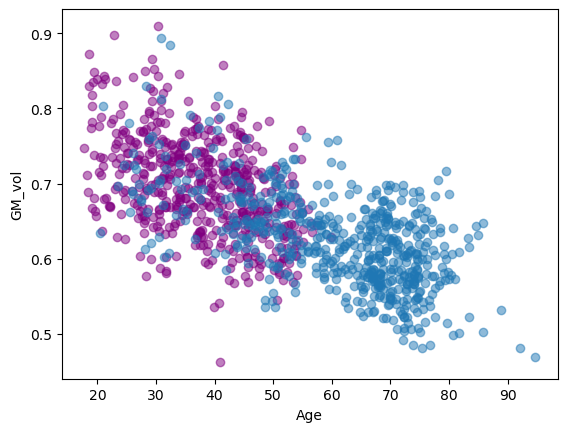

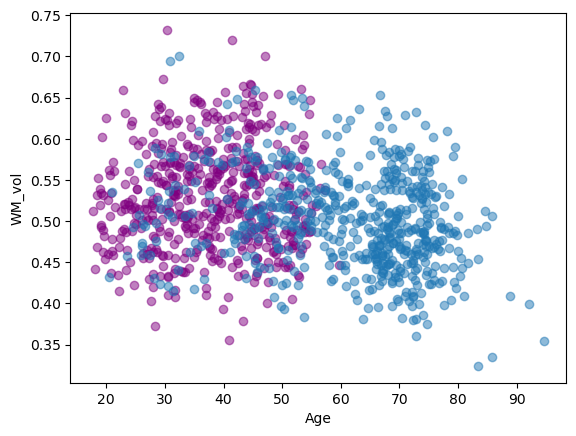

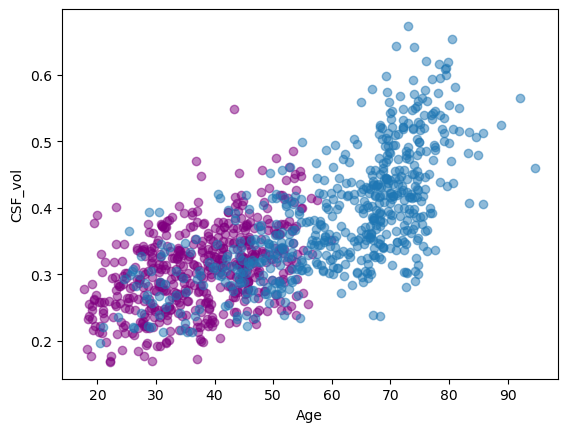

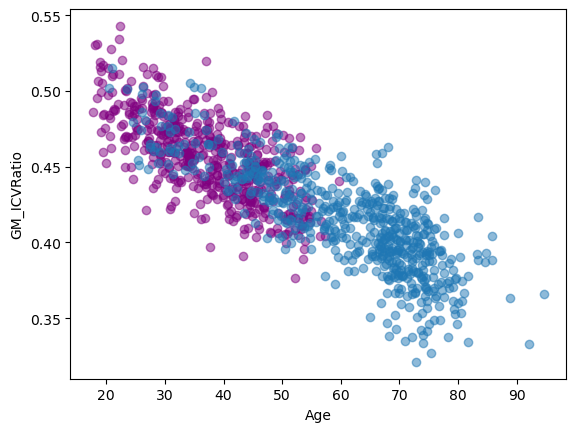

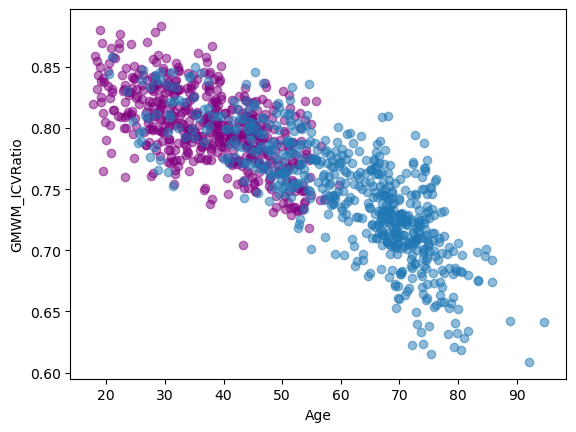

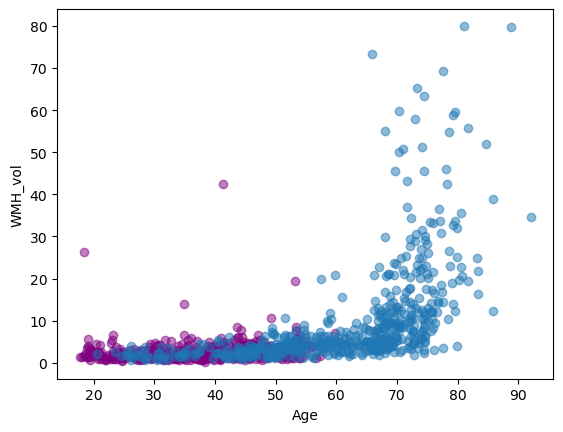

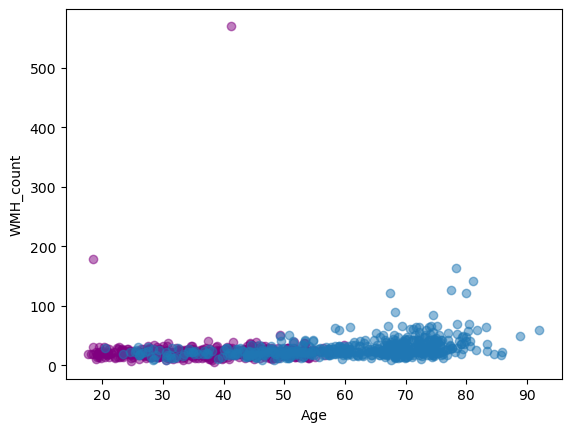

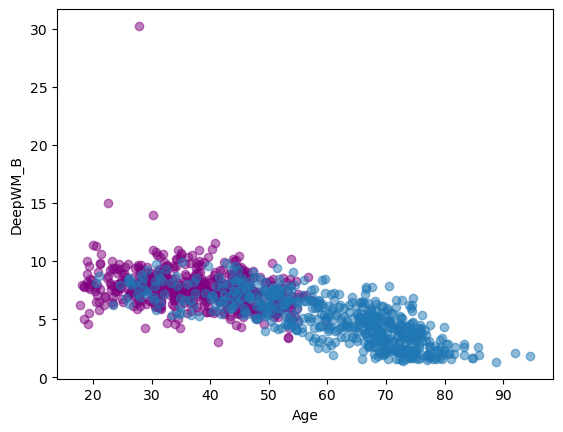

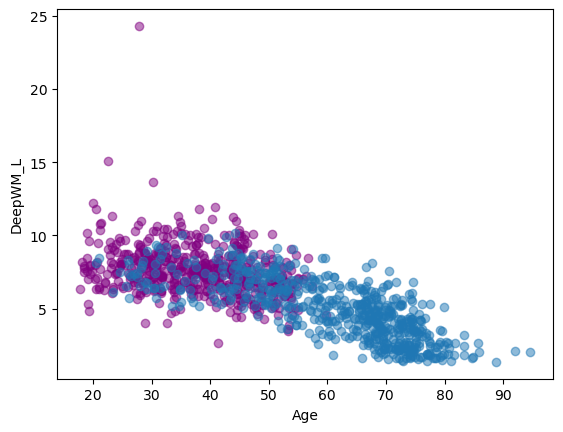

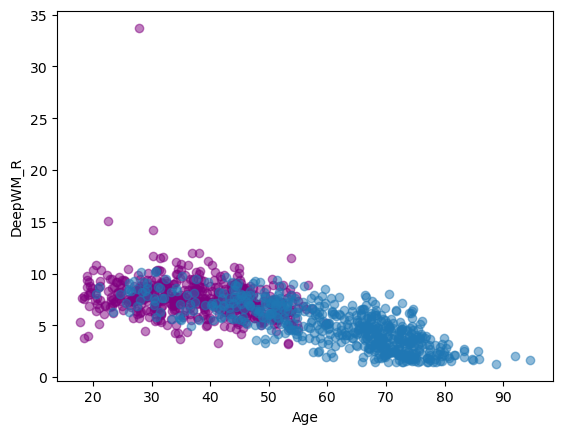

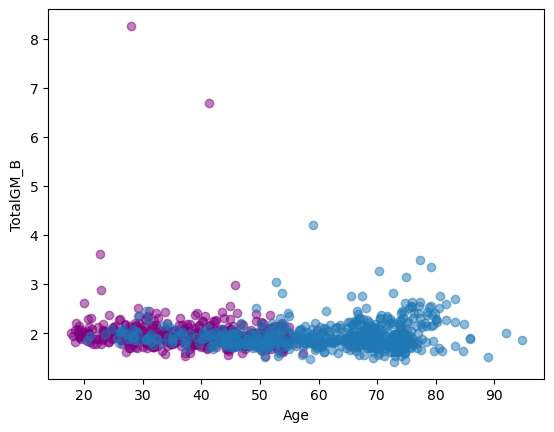

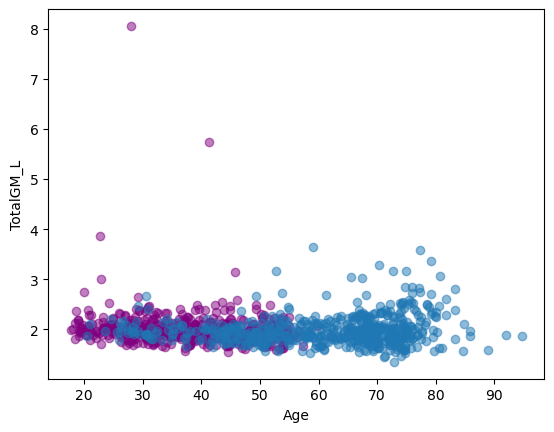

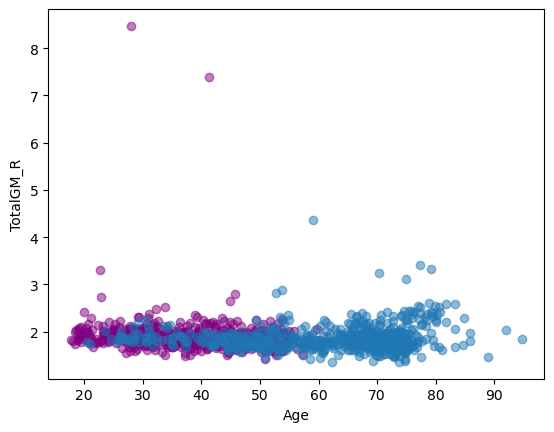

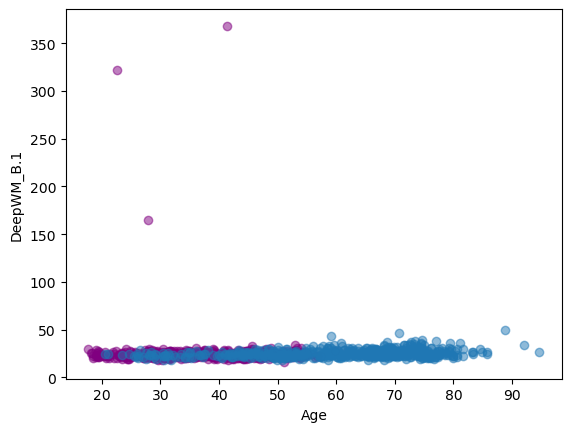

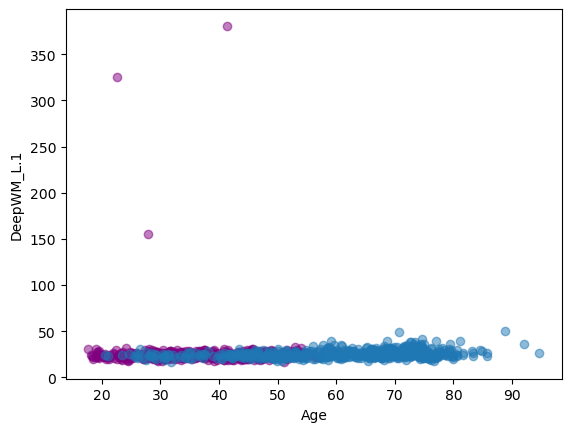

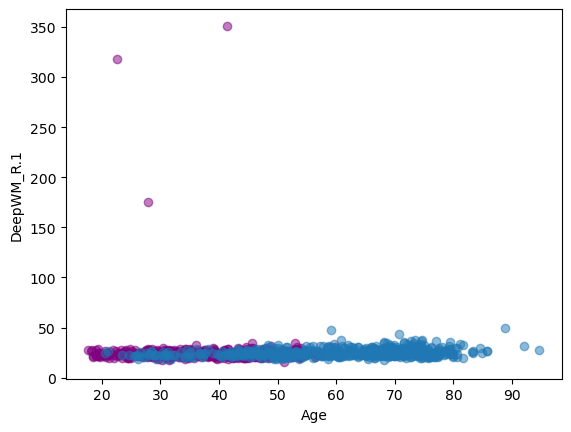

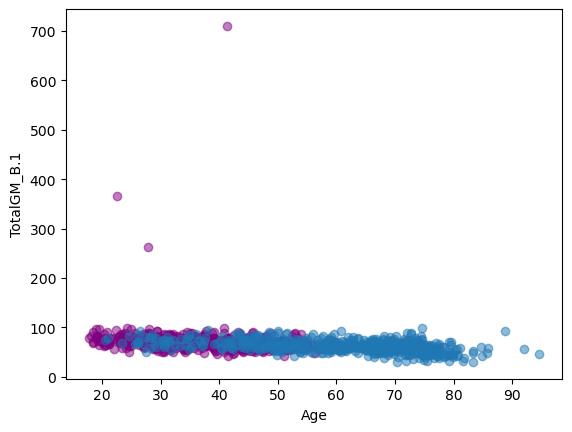

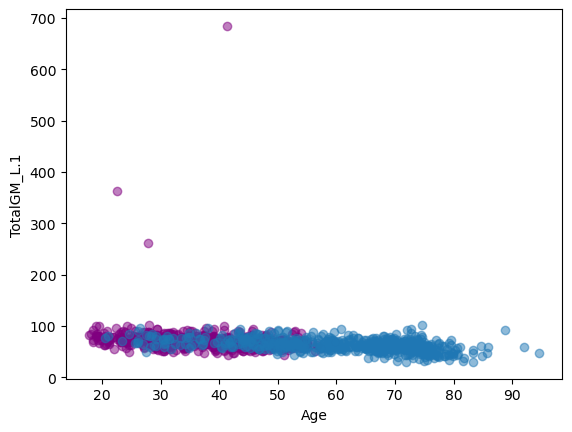

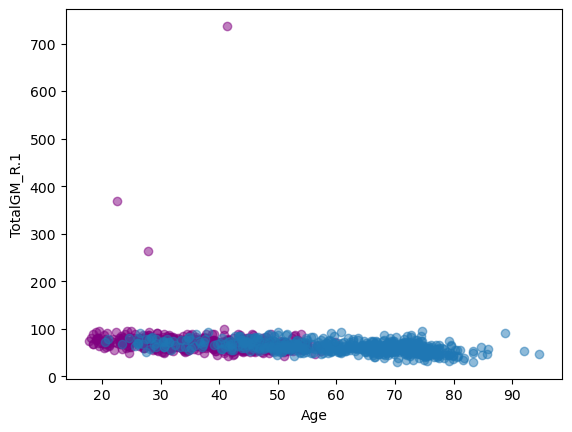

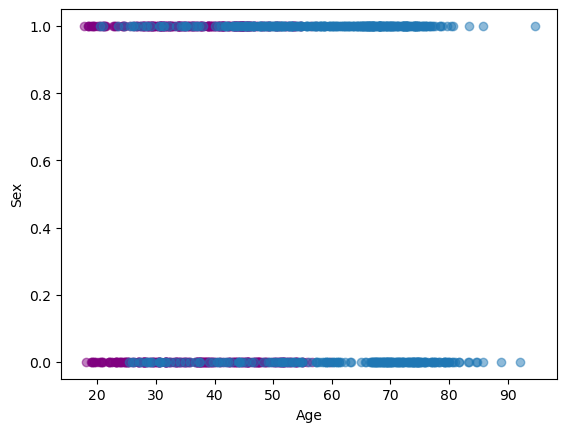

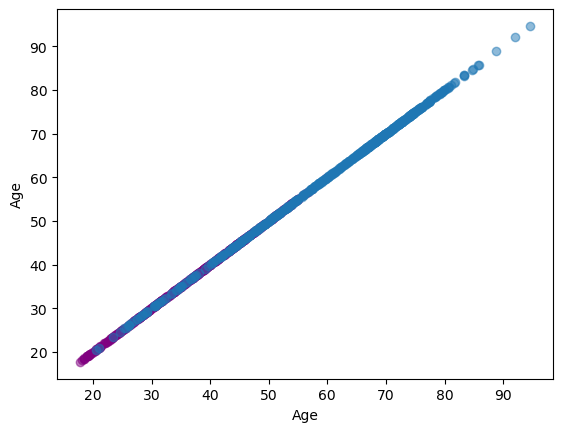

<Figure size 640x480 with 0 Axes>

In [210]:
shared_columns = (TOP.columns.intersection(StrokeMRI.columns)).to_list()
for rotator_column in TOP[shared_columns]:
    relate_columns_graphs_two_dfs(TOP, StrokeMRI,'Age', rotator_column)

In [167]:
TOP.shape

(895, 99)

In [168]:
StrokeMRI.shape

(588, 30)

In [171]:
a = TOP.columns.intersection(StrokeMRI.columns)
a

Index(['session', 'LongitudinalTimePoint', 'SubjectNList', 'Site', 'GM_vol',
       'WM_vol', 'CSF_vol', 'GM_ICVRatio', 'GMWM_ICVRatio', 'WMH_vol',
       'WMH_count', 'DeepWM_B', 'DeepWM_L', 'DeepWM_R', 'TotalGM_B',
       'TotalGM_L', 'TotalGM_R', 'DeepWM_B.1', 'DeepWM_L.1', 'DeepWM_R.1',
       'TotalGM_B.1', 'TotalGM_L.1', 'TotalGM_R.1', 'Sex', 'Age'],
      dtype='object')